## Using positive samples from previous years

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

Loading data from 2020 challenge:

In [2]:
train_df = pd.read_csv("train.csv")

In [3]:
def append_ext(filename):
    return filename + ".png"

In [4]:
train_df['image_name'] = train_df['image_name'].apply(append_ext)

Now we will extract positive samples from data sets from previous years:

In [5]:
prev_df = pd.read_csv(r'D:\uni\masters\ML\project\my_code\old_data\ISIC_2019_Training_GroundTruth.csv')

In [6]:
prev_df.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
## extracting only positive samples:

In [8]:
prev_positive = prev_df[prev_df['MEL'] == 1]

In [9]:
prev_positive.shape[0]

4522

In [10]:
prev_positive['image'].iloc[0] + '.jpg'

'ISIC_0000002.jpg'

In [20]:
img = cv2.imread(r'D:\uni\masters\ML\project\my_code\old_data\ISIC_2019_Training_Input\ISIC_2019_Training_Input\\'+ prev_positive['image'].iloc[0] + '.jpg')

In [22]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

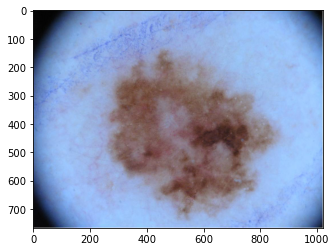

In [23]:
plt.imshow(img_rgb)

In [25]:
img_resize = cv2.resize(img, (244, 244))

In [26]:
img_resize = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)

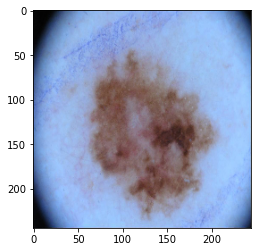

In [27]:
plt.imshow(img_resize)

In [14]:
# for changing reading and writing directories
import os

In [25]:
i = 0
old_image_names = []
read_directory = r'D:\uni\masters\ML\project\my_code\old_data\ISIC_2019_Training_Input\ISIC_2019_Training_Input\\'
write_directory = r'D:\uni\masters\ML\project\my_code\renamed_resized_positive_old\\'
for file_name in prev_positive['image']:
    i += 1
    print(f"image {i}/{prev_positive.shape[0]}")
    os.chdir(read_directory)
    new_name = 'old' + file_name
    old_image_names.append(new_name)
    # img = cv2.imread(file_name + '.jpg')
    # result = cv2.resize(img, (224, 224))
    # os.chdir(write_directory)
    # cv2.imwrite(new_name + '.png', result)
    

image 1/4522
image 2/4522
image 3/4522
image 4/4522
image 5/4522
image 6/4522
image 7/4522
image 8/4522
image 9/4522
image 10/4522
image 11/4522
image 12/4522
image 13/4522
image 14/4522
image 15/4522
image 16/4522
image 17/4522
image 18/4522
image 19/4522
image 20/4522
image 21/4522
image 22/4522
image 23/4522
image 24/4522
image 25/4522
image 26/4522
image 27/4522
image 28/4522
image 29/4522
image 30/4522
image 31/4522
image 32/4522
image 33/4522
image 34/4522
image 35/4522
image 36/4522
image 37/4522
image 38/4522
image 39/4522
image 40/4522
image 41/4522
image 42/4522
image 43/4522
image 44/4522
image 45/4522
image 46/4522
image 47/4522
image 48/4522
image 49/4522
image 50/4522
image 51/4522
image 52/4522
image 53/4522
image 54/4522
image 55/4522
image 56/4522
image 57/4522
image 58/4522
image 59/4522
image 60/4522
image 61/4522
image 62/4522
image 63/4522
image 64/4522
image 65/4522
image 66/4522
image 67/4522
image 68/4522
image 69/4522
image 70/4522
image 71/4522
image 72/4522
i

In [26]:
old_positive = pd.DataFrame()

In [27]:
old_positive['image_name'] = old_image_names
old_positive['target'] = np.ones((old_positive.shape[0]), dtype=np.int64)

In [28]:
old_positive.head()

,image_name,target
0,oldISIC_0000002,1
1,oldISIC_0000004,1
2,oldISIC_0000013,1
3,oldISIC_0000022_downsampled,1
4,oldISIC_0000026_downsampled,1


In [29]:
os.chdir(r'D:\uni\masters\ML\project\my_code\\')

In [30]:
old_positive.to_csv('old_positive.csv')

In [31]:
old_positive.head()

,image_name,target
0,oldISIC_0000002,1
1,oldISIC_0000004,1
2,oldISIC_0000013,1
3,oldISIC_0000022_downsampled,1
4,oldISIC_0000026_downsampled,1


In [32]:
def append_ext(filename):
    return filename + ".png"

In [33]:
old_positive['image_name'] = old_positive['image_name'].apply(append_ext)

In [34]:
old_positive.head()

,image_name,target
0,oldISIC_0000002.png,1
1,oldISIC_0000004.png,1
2,oldISIC_0000013.png,1
3,oldISIC_0000022_downsampled.png,1
4,oldISIC_0000026_downsampled.png,1


In [35]:
train = train_df[['image_name', 'target']]

In [36]:
train.head()

,image_name,target
0,ISIC_2637011.png,0
1,ISIC_0015719.png,0
2,ISIC_0052212.png,0
3,ISIC_0068279.png,0
4,ISIC_0074268.png,0


In [37]:
train.shape[0]

33126

In [38]:
train = pd.concat([train, old_positive])

In [39]:
train.shape[0]

37648

In [40]:
train.head()

,image_name,target
0,ISIC_2637011.png,0
1,ISIC_0015719.png,0
2,ISIC_0052212.png,0
3,ISIC_0068279.png,0
4,ISIC_0074268.png,0


In [41]:
train.to_csv('more_data.csv')

Next we split data into train and validation set:

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_val, y_train, y_val = train_test_split(train['image_name'],
                                                 train['target'],
                                                 test_size = 0.2,
                                                 random_state = 111)

In [44]:
train_df = pd.DataFrame({'image_name': X_train, 'target': y_train})
val_df = pd.DataFrame({'image_name': X_val, 'target': y_val})

In [45]:
print(f"{train_df.shape[0]} samples in the train set, where {train_df[train_df['target'] == 1].shape[0]} are positive.")
print(f"{val_df.shape[0]} samples in the validation set, where {val_df[val_df['target'] == 1].shape[0]} are positive.")

30118 samples in the train set, where 4088 are positive.
7530 samples in the validation set, where 1018 are positive.


Generate input to our pre-tained network:

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [47]:
train_datagen = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    directory = r'D:\uni\masters\ML\project\my_code\combined_data_set',
    x_col = 'image_name',
    y_col = 'target',
    batch_size = 32,
    target_size=(224, 224),
    shuffle = True,
    class_mode = 'raw',
    seed = 111
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe = val_df,
    directory = r'D:\uni\masters\ML\project\my_code\combined_data_set',
    x_col = 'image_name',
    y_col = 'target',
    batch_size = 32,
    target_size=(224, 224),
    shuffle = True,
    class_mode = 'raw',
    seed = 111
)

Found 30118 validated image filenames.
Found 7530 validated image filenames.


## Checking GPU

In [48]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4798070886984996607
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3061265204
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10151024403946894424
physical_device_desc: "device: 0, name: GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [49]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
import keras

Using TensorFlow backend.


In [50]:
tf.test.gpu_device_name()

'/device:GPU:0'

## Loading pre-trained InceptionV3

In [51]:
import PIL

In [52]:
# we use input shape 224*224 in all our models 
input_tensor = Input(shape=(224, 224, 3))

In [53]:
inceptionv3_model = tf.keras.applications.InceptionV3(weights='imagenet',
                                                     input_tensor=input_tensor,
                                                     include_top=False)


Adding new layers on top of InceptionV3:

In [54]:
x = inceptionv3_model.output

In [55]:
x = GlobalAveragePooling2D()(x)

In [56]:
x = Dense(units=1024, activation='relu')(x)

In [57]:
predictions = Dense(units=1, activation='sigmoid')(x)

In [58]:
model = Model(inputs=inceptionv3_model.input,
             outputs=predictions)

First, we train newly added layers:

In [59]:
for layer in inceptionv3_model.layers:
    layer.trainable = False

In [60]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['AUC'])

In [61]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    steps_per_epoch = train_df.shape[0]//32,
    epochs = 20,
    validation_steps = val_df.shape[0]//32
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 941 steps, validate for 235 steps
Epoch 1/20
941/941 [==============================] - 508s 540ms/step - loss: 0.2434 - AUC: 0.9011 - val_loss: 10.4476 - val_AUC: 0.4998
Epoch 2/20
941/941 [==============================] - 397s 422ms/step - loss: 0.1888 - AUC: 0.9341 - val_loss: 20.8644 - val_AUC: 0.5000
Epoch 3/20
941/941 [==============================] - 363s 386ms/step - loss: 0.1809 - AUC: 0.9365 - val_loss: 10.9289 - val_AUC: 0.5042
Epoch 4/20
941/941 [==============================] - 352s 374ms/step - loss: 0.1709 - AUC: 0.9433 - val_loss: 17.5340 - val_AUC: 0.4999
Epoch 5/20
941/941 [==============================] - 361s 384ms/step - loss: 0.1661 - AUC: 0.9461 - val_loss: 12.8972 - val_AUC: 0.5017
Epoch 6/20
941/941 [==============================] - 362s 384ms/step - loss: 0.1635 - AUC: 0.9485 - val_loss: 23.4622 - val_AUC: 0.5000
Epoch 7/20
941/941 [==============================] - 380s 404ms/step - loss: 0.1602

## Predictions

In [65]:
test_df = pd.read_csv('test.csv')

In [70]:
i = 0
predictions = []
for image_name in test_df['image_name']:
    i += 1
    print(f"image {i}/{test_df.shape[0]}")
    filename = image_name+".png"
    img = cv2.imread(r'D:\uni\masters\ML\project\my_code\archive\test\\'+filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    x = tf.keras.applications.inception_v3.preprocess_input(img)
    x = np.reshape(x, (1, 224, 224, 3))
    target = model.predict(x)
    predictions.append(target[0][0])

image 1/10982
image 2/10982
image 3/10982
image 4/10982
image 5/10982
image 6/10982
image 7/10982
image 8/10982
image 9/10982
image 10/10982
image 11/10982
image 12/10982
image 13/10982
image 14/10982
image 15/10982
image 16/10982
image 17/10982
image 18/10982
image 19/10982
image 20/10982
image 21/10982
image 22/10982
image 23/10982
image 24/10982
image 25/10982
image 26/10982
image 27/10982
image 28/10982
image 29/10982
image 30/10982
image 31/10982
image 32/10982
image 33/10982
image 34/10982
image 35/10982
image 36/10982
image 37/10982
image 38/10982
image 39/10982
image 40/10982
image 41/10982
image 42/10982
image 43/10982
image 44/10982
image 45/10982
image 46/10982
image 47/10982
image 48/10982
image 49/10982
image 50/10982
image 51/10982
image 52/10982
image 53/10982
image 54/10982
image 55/10982
image 56/10982
image 57/10982
image 58/10982
image 59/10982
image 60/10982
image 61/10982
image 62/10982
image 63/10982
image 64/10982
image 65/10982
image 66/10982
image 67/10982
imag

In [71]:
test_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


In [72]:
submission['image_name'] = test_df['image_name']

In [73]:
submission['target'] = predictions

In [74]:
submission.head()

,image_name,target
0,ISIC_0052060,1.943402e-12
1,ISIC_0052349,1.486542e-10
2,ISIC_0058510,2.479754e-11
3,ISIC_0073313,7.602008e-10
4,ISIC_0073502,2.089549e-07


In [75]:
submission.to_csv('submission2.csv', index=False)

## Fine-tuning part of InceptionV3

In [77]:
for i, layer in enumerate(inceptionv3_model.layers):
   print(i, layer.name)

0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_12
52 conv2d_14
53 conv2d_17
54 conv2d_18
55 batch_normalization_12
56 batch_normalization_14
5

In [ ]:
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True

In [78]:
from tensorflow.keras.optimizers import Adam

In [79]:
model.compile(optimizer=Adam(lr=0.0001),
             loss='binary_crossentropy',
             metrics=['AUC'])

In [80]:
history_2 = model.fit(
    train_generator,
    validation_data = val_generator,
    steps_per_epoch = train_df.shape[0]//32,
    epochs = 40,
    validation_steps = val_df.shape[0]//32
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 941 steps, validate for 235 steps
Epoch 1/40
941/941 [==============================] - 433s 460ms/step - loss: 0.1339 - AUC: 0.9644 - val_loss: 40.8677 - val_AUC: 0.4999
Epoch 2/40
941/941 [==============================] - 415s 441ms/step - loss: 0.1323 - AUC: 0.9658 - val_loss: 44.3680 - val_AUC: 0.4999
Epoch 3/40
941/941 [==============================] - 416s 442ms/step - loss: 0.1317 - AUC: 0.9659 - val_loss: 45.2084 - val_AUC: 0.4999
Epoch 4/40
941/941 [==============================] - 416s 443ms/step - loss: 0.1287 - AUC: 0.9677 - val_loss: 48.4393 - val_AUC: 0.4999
Epoch 5/40
941/941 [==============================] - 411s 437ms/step - loss: 0.1311 - AUC: 0.9665 - val_loss: 48.8442 - val_AUC: 0.4999
Epoch 6/40
941/941 [==============================] - 402s 428ms/step - loss: 0.1291 - AUC: 0.9660 - val_loss: 48.1525 - val_AUC: 0.4999
Epoch 7/40
941/941 [==============================] - 409s 434ms/step - loss: 0.1288

In [81]:
i = 0
predictions = []
for image_name in test_df['image_name']:
    i += 1
    print(f"image {i}/{test_df.shape[0]}")
    filename = image_name+".png"
    img = cv2.imread(r'D:\uni\masters\ML\project\my_code\archive\test\\'+filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    x = tf.keras.applications.inception_v3.preprocess_input(img)
    x = np.reshape(x, (1, 224, 224, 3))
    target = model.predict(x)
    predictions.append(target[0][0])

image 1/10982
image 2/10982
image 3/10982
image 4/10982
image 5/10982
image 6/10982
image 7/10982
image 8/10982
image 9/10982
image 10/10982
image 11/10982
image 12/10982
image 13/10982
image 14/10982
image 15/10982
image 16/10982
image 17/10982
image 18/10982
image 19/10982
image 20/10982
image 21/10982
image 22/10982
image 23/10982
image 24/10982
image 25/10982
image 26/10982
image 27/10982
image 28/10982
image 29/10982
image 30/10982
image 31/10982
image 32/10982
image 33/10982
image 34/10982
image 35/10982
image 36/10982
image 37/10982
image 38/10982
image 39/10982
image 40/10982
image 41/10982
image 42/10982
image 43/10982
image 44/10982
image 45/10982
image 46/10982
image 47/10982
image 48/10982
image 49/10982
image 50/10982
image 51/10982
image 52/10982
image 53/10982
image 54/10982
image 55/10982
image 56/10982
image 57/10982
image 58/10982
image 59/10982
image 60/10982
image 61/10982
image 62/10982
image 63/10982
image 64/10982
image 65/10982
image 66/10982
image 67/10982
imag

In [88]:
predictions[:2]

[8.1182067e-10, 9.965991e-09]

In [89]:
submission['target'][:2]

0    1.943402e-12
1    1.486542e-10
Name: target, dtype: float64

In [90]:
submission['target'] = predictions

In [91]:
submission.head()

,image_name,target
0,ISIC_0052060,8.118207e-10
1,ISIC_0052349,9.965991e-09
2,ISIC_0058510,2.168136e-09
3,ISIC_0073313,1.256949e-08
4,ISIC_0073502,2.090184e-07


In [92]:
submission.to_csv('submission3.csv', index=False)